In [302]:
import pandas as pd
import numpy as np

In [303]:
#opportunities = pd.read_csv('data/TEST_CLOSED_Last_100.csv', index_col=0)
#opportunities = pd.read_csv('data/all_closed_opps_since_nov_2015_won_vs_lost_and_cancelled.csv', index_col=0)
opportunities = pd.read_csv('data/all_closed_opps_since_june_2015_won_vs_lost_and_cancelled_by_sales_team.csv', index_col=0)

In [304]:
opportunities = opportunities[opportunities.lead_sales.notnull()]
opportunities.head()

StageID stage_category  new_opportunity_days  \
opportunityId                                                 
981948               7            won                     0   
977958               7            won                     0   
972101               7            won                     0   
969817               7            won                     0   
967155               7            won                     0   

               qualified_opp_days  demo_complete_days  proposal_sent_days  \
opportunityId                                                               
981948                          0                   0                   0   
977958                          0                   0                   0   
972101                          0                   0                   0   
969817                          0                   0                   0   
967155                          4                   0                   0   

               pending_signature_days  nurture_days  closed_won_days  \
opportunityId                                                          
981948                              0             0                0   
977958                              0             0                0   
972101                             22             0                0   
969817                              0             0                0   
967155                              0             0                0   

               closed_lost     ...     crm_license_count ready_only_count  \
opportunityId                  ...                                          
981948                   0     ...                     0                0   
977958                   0     ...                     0                0   
972101                   0     ...                     0                0   
969817                   0     ...                     0                0   
967155                   0     ...                     0                0   

              FDC_Needed total_livecycle  qualification_days_from_start  \
opportunityId                                                             
981948             False               2                              0   
977958             False             -58                              0   
972101             False              25                              0   
969817             False              31                              0   
967155             False              20                              0   

              first_demo_days_from_start  ForeCastCategory  FirmSize  \
opportunityId                                                          
981948                               -15            Commit         0   
977958                                 0            Commit         0   
972101                                 8         Best Case         0   
969817                               -21            Commit         0   
967155                                 7            Commit         0   

               uses_count  lead_sales  
opportunityId                          
981948                  1  Veeravalli  
977958                  3  Rademacher  
972101                  1  Veeravalli  
969817                  1  Veeravalli  
967155                  3       Reyna  

[5 rows x 27 columns]

In [305]:
opportunities.shape
print( opportunities.columns )

Index(['StageID', 'stage_category', 'new_opportunity_days',
       'qualified_opp_days', 'demo_complete_days', 'proposal_sent_days',
       'pending_signature_days', 'nurture_days', 'closed_won_days',
       'closed_lost', 'origin_date', 'create_date', 'start_date', 'clost_date',
       'Estimated_Contract_Value', 'Company', 'Full_License_Count',
       'crm_license_count', 'ready_only_count', 'FDC_Needed',
       'total_livecycle', 'qualification_days_from_start',
       'first_demo_days_from_start', 'ForeCastCategory', 'FirmSize',
       'uses_count', 'lead_sales'],
      dtype='object')


In [307]:
#opportunities = opportunities.join(pd.get_dummies(opportunities.stage_category, prefix="is_"))
#is_won_dummies = pd.get_dummies(opportunities.stage_category, prefix="is_")
opportunities = opportunities.join(pd.get_dummies(opportunities.lead_sales, prefix="_sales_rep_"))
#opportunities.join(is_won_dummies)
opportunities.columns

Index(['StageID', 'stage_category', 'new_opportunity_days',
       'qualified_opp_days', 'demo_complete_days', 'proposal_sent_days',
       'pending_signature_days', 'nurture_days', 'closed_won_days',
       'closed_lost', 'origin_date', 'create_date', 'start_date', 'clost_date',
       'Estimated_Contract_Value', 'Company', 'Full_License_Count',
       'crm_license_count', 'ready_only_count', 'FDC_Needed',
       'total_livecycle', 'qualification_days_from_start',
       'first_demo_days_from_start', 'ForeCastCategory', 'FirmSize',
       'uses_count', 'lead_sales', 'is__lost', 'is__won',
       '_sales_rep__Cornish', '_sales_rep__Hazlett', '_sales_rep__Hughes',
       '_sales_rep__Rademacher', '_sales_rep__Reyna', '_sales_rep__Veeravalli',
       '_sales_rep__Warren'],
      dtype='object')

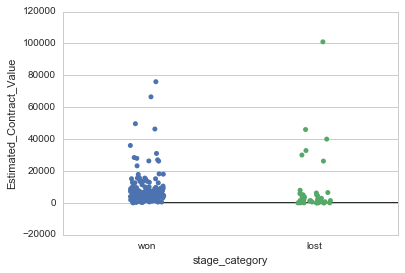

In [308]:
%matplotlib inline
opportunities.groupby('stage_category').Estimated_Contract_Value.hist()

import seaborn as sns
sns.set_style("whitegrid")

sns.stripplot(x="stage_category", y="Estimated_Contract_Value", data=opportunities, jitter=True)

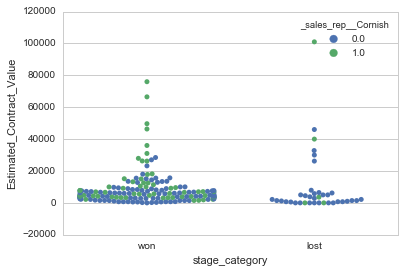

In [309]:
# Cornish
sns.swarmplot(x="stage_category", y="Estimated_Contract_Value", hue="_sales_rep__Cornish", data=opportunities)

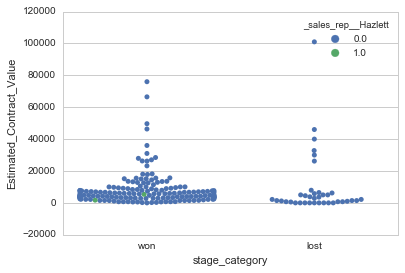

In [310]:
# Hazlett
sns.swarmplot(x="stage_category", y="Estimated_Contract_Value", hue="_sales_rep__Hazlett", data=opportunities)

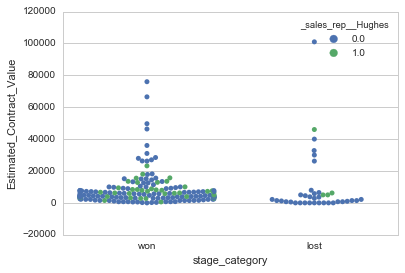

In [311]:
# Hughes
sns.swarmplot(x="stage_category", y="Estimated_Contract_Value", hue="_sales_rep__Hughes", data=opportunities)

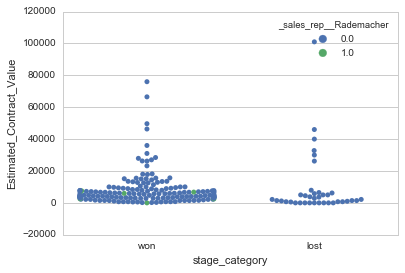

In [312]:
# Rademacher
sns.swarmplot(x="stage_category", y="Estimated_Contract_Value", hue="_sales_rep__Rademacher", data=opportunities)

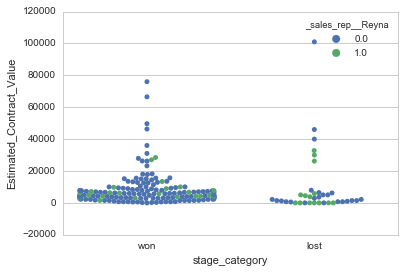

In [313]:
# Reyna
sns.swarmplot(x="stage_category", y="Estimated_Contract_Value", hue="_sales_rep__Reyna", data=opportunities)

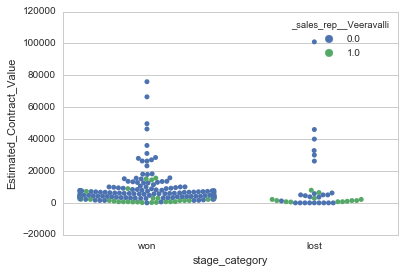

In [314]:
# Veeravalli
sns.swarmplot(x="stage_category", y="Estimated_Contract_Value", hue="_sales_rep__Veeravalli", data=opportunities)

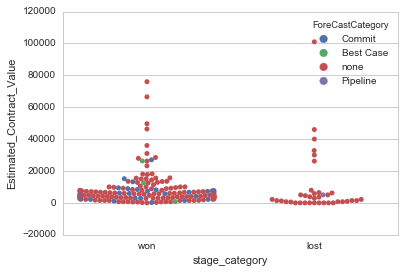

In [315]:
# Forecast Type
sns.swarmplot(x="stage_category", y="Estimated_Contract_Value", hue="ForeCastCategory", data=opportunities)

In [316]:
print(opportunities.shape)
#opportunities = opportunities[opportunities.first_demo_days_from_start.notnull()]
#opportunities = opportunities[opportunities.total_livecycle.notnull()]
#opportunities = opportunities[opportunities.Estimated_Contract_Value.notnull()]
#opportunities = opportunities[opportunities.nurture_days.notnull()]
opportunities = opportunities[opportunities.ForeCastCategory.notnull()]

(200, 36)


In [317]:
opportunities.shape

(200, 36)

In [323]:
#opportunities = opportunities.join(pd.get_dummies(opportunities.ForeCastCategory, prefix="forecast_"))
opportunities.columns

Index(['StageID', 'stage_category', 'new_opportunity_days',
       'qualified_opp_days', 'demo_complete_days', 'proposal_sent_days',
       'pending_signature_days', 'nurture_days', 'closed_won_days',
       'closed_lost', 'origin_date', 'create_date', 'start_date', 'clost_date',
       'Estimated_Contract_Value', 'Company', 'Full_License_Count',
       'crm_license_count', 'ready_only_count', 'FDC_Needed',
       'total_livecycle', 'qualification_days_from_start',
       'first_demo_days_from_start', 'ForeCastCategory', 'FirmSize',
       'uses_count', 'lead_sales', 'is__lost', 'is__won',
       '_sales_rep__Cornish', '_sales_rep__Hazlett', '_sales_rep__Hughes',
       '_sales_rep__Rademacher', '_sales_rep__Reyna', '_sales_rep__Veeravalli',
       '_sales_rep__Warren', 'forecast__Best Case', 'forecast__Commit',
       'forecast__Pipeline', 'forecast__none'],
      dtype='object')

In [348]:
from sklearn import grid_search, cross_validation
from sklearn.linear_model import LogisticRegression


#feature_set = opportunities[['first_demo_days_from_start', 'total_livecycle', 'Estimated_Contract_Value']]
feature_set = opportunities[['Estimated_Contract_Value','forecast__Commit','_sales_rep__Cornish','forecast__Pipeline','forecast__Best Case']]
won_gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
    cv=cross_validation.KFold(n=len(opportunities), n_folds=7),
    scoring='roc_auc'
)

In [349]:

won_gs.fit(feature_set, opportunities.is__won)
won_gs.grid_scores_


[mean: 0.63179, std: 0.16165, params: {'C': 100000, 'class_weight': None},
 mean: 0.63909, std: 0.15264, params: {'C': 100000, 'class_weight': 'balanced'},
 mean: 0.63179, std: 0.16165, params: {'C': 10000, 'class_weight': None},
 mean: 0.63909, std: 0.15264, params: {'C': 10000, 'class_weight': 'balanced'},
 mean: 0.63179, std: 0.16165, params: {'C': 1000, 'class_weight': None},
 mean: 0.63909, std: 0.15264, params: {'C': 1000, 'class_weight': 'balanced'},
 mean: 0.63179, std: 0.16165, params: {'C': 100, 'class_weight': None},
 mean: 0.63909, std: 0.15264, params: {'C': 100, 'class_weight': 'balanced'},
 mean: 0.63179, std: 0.16165, params: {'C': 10, 'class_weight': None},
 mean: 0.63909, std: 0.15264, params: {'C': 10, 'class_weight': 'balanced'},
 mean: 0.63179, std: 0.16165, params: {'C': 1, 'class_weight': None},
 mean: 0.63179, std: 0.16165, params: {'C': 1, 'class_weight': 'balanced'},
 mean: 0.63509, std: 0.10401, params: {'C': 0.1, 'class_weight': None},
 mean: 0.63179, std: 0

In [350]:
print(won_gs.best_estimator_)
print(won_gs.best_params_)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
{'C': 0.01, 'class_weight': None}


In [351]:
won_gs.best_score_

0.6553374807559591

In [406]:
from sklearn import grid_search, cross_validation
from sklearn.linear_model import LogisticRegression


feature_set = opportunities[['Estimated_Contract_Value','forecast__Commit','_sales_rep__Cornish','forecast__Pipeline','forecast__Best Case','total_livecycle']]
won_gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
    cv=cross_validation.KFold(n=len(opportunities), n_folds=7),
    scoring='roc_auc'
)

In [407]:
won_gs.fit(feature_set, opportunities.is__won)
won_gs.grid_scores_

[mean: 0.80615, std: 0.11380, params: {'C': 100000, 'class_weight': None},
 mean: 0.81972, std: 0.10541, params: {'C': 100000, 'class_weight': 'balanced'},
 mean: 0.80615, std: 0.11380, params: {'C': 10000, 'class_weight': None},
 mean: 0.81972, std: 0.10541, params: {'C': 10000, 'class_weight': 'balanced'},
 mean: 0.80615, std: 0.11380, params: {'C': 1000, 'class_weight': None},
 mean: 0.81972, std: 0.10541, params: {'C': 1000, 'class_weight': 'balanced'},
 mean: 0.80615, std: 0.11380, params: {'C': 100, 'class_weight': None},
 mean: 0.81785, std: 0.10441, params: {'C': 100, 'class_weight': 'balanced'},
 mean: 0.80615, std: 0.11380, params: {'C': 10, 'class_weight': None},
 mean: 0.81785, std: 0.10441, params: {'C': 10, 'class_weight': 'balanced'},
 mean: 0.81098, std: 0.11536, params: {'C': 1, 'class_weight': None},
 mean: 0.81542, std: 0.10602, params: {'C': 1, 'class_weight': 'balanced'},
 mean: 0.76499, std: 0.10061, params: {'C': 0.1, 'class_weight': None},
 mean: 0.79945, std: 0

In [408]:
print(won_gs.best_estimator_)
print(won_gs.best_params_)

LogisticRegression(C=100000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
{'C': 100000, 'class_weight': 'balanced'}


In [409]:
# With Total Livecycle included.
won_gs.best_score_

0.81971874701385561

In [410]:
from sklearn import grid_search, cross_validation
from sklearn.linear_model import LogisticRegression


feature_set = opportunities[['Estimated_Contract_Value','forecast__Commit','_sales_rep__Hughes','forecast__Pipeline','forecast__Best Case','total_livecycle']]
won_gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
    cv=cross_validation.KFold(n=len(opportunities), n_folds=7),
    scoring='roc_auc'
)

In [411]:
won_gs.fit(feature_set, opportunities.is__won)
won_gs.grid_scores_

[mean: 0.79453, std: 0.11945, params: {'C': 100000, 'class_weight': None},
 mean: 0.81388, std: 0.11562, params: {'C': 100000, 'class_weight': 'balanced'},
 mean: 0.79453, std: 0.11945, params: {'C': 10000, 'class_weight': None},
 mean: 0.81388, std: 0.11562, params: {'C': 10000, 'class_weight': 'balanced'},
 mean: 0.79453, std: 0.11945, params: {'C': 1000, 'class_weight': None},
 mean: 0.81388, std: 0.11562, params: {'C': 1000, 'class_weight': 'balanced'},
 mean: 0.79453, std: 0.11945, params: {'C': 100, 'class_weight': None},
 mean: 0.81388, std: 0.11562, params: {'C': 100, 'class_weight': 'balanced'},
 mean: 0.79367, std: 0.11976, params: {'C': 10, 'class_weight': None},
 mean: 0.81267, std: 0.11211, params: {'C': 10, 'class_weight': 'balanced'},
 mean: 0.78951, std: 0.14213, params: {'C': 1, 'class_weight': None},
 mean: 0.81645, std: 0.11065, params: {'C': 1, 'class_weight': 'balanced'},
 mean: 0.75056, std: 0.16608, params: {'C': 0.1, 'class_weight': None},
 mean: 0.81963, std: 0

In [412]:
print(won_gs.best_estimator_)
print(won_gs.best_params_)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
{'C': 0.1, 'class_weight': 'balanced'}


In [413]:
# With Hughes included and Total Livescycle included.
won_gs.best_score_

0.81963341628178565

In [424]:
from sklearn import grid_search, cross_validation
from sklearn.linear_model import LogisticRegression


feature_set = opportunities[['Estimated_Contract_Value','forecast__Commit','_sales_rep__Reyna','forecast__Pipeline','forecast__Best Case','total_livecycle']]
won_gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
    cv=cross_validation.KFold(n=len(opportunities), n_folds=7),
    scoring='roc_auc'
)

In [425]:
won_gs.fit(feature_set, opportunities.is__won)
won_gs.grid_scores_

[mean: 0.78406, std: 0.11497, params: {'C': 100000, 'class_weight': None},
 mean: 0.80744, std: 0.10335, params: {'C': 100000, 'class_weight': 'balanced'},
 mean: 0.78406, std: 0.11497, params: {'C': 10000, 'class_weight': None},
 mean: 0.80744, std: 0.10335, params: {'C': 10000, 'class_weight': 'balanced'},
 mean: 0.78406, std: 0.11497, params: {'C': 1000, 'class_weight': None},
 mean: 0.80744, std: 0.10335, params: {'C': 1000, 'class_weight': 'balanced'},
 mean: 0.78406, std: 0.11497, params: {'C': 100, 'class_weight': None},
 mean: 0.80744, std: 0.10335, params: {'C': 100, 'class_weight': 'balanced'},
 mean: 0.78406, std: 0.11497, params: {'C': 10, 'class_weight': None},
 mean: 0.80744, std: 0.10335, params: {'C': 10, 'class_weight': 'balanced'},
 mean: 0.79059, std: 0.11432, params: {'C': 1, 'class_weight': None},
 mean: 0.80623, std: 0.10297, params: {'C': 1, 'class_weight': 'balanced'},
 mean: 0.73148, std: 0.11107, params: {'C': 0.1, 'class_weight': None},
 mean: 0.79306, std: 0

In [426]:
print(won_gs.best_estimator_)
print(won_gs.best_params_)

LogisticRegression(C=100000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
{'C': 100000, 'class_weight': 'balanced'}


In [427]:
# With Reyna included and Total Livescycle included.
won_gs.best_score_

0.80744312589584322

In [428]:
from sklearn import grid_search, cross_validation
from sklearn.linear_model import LogisticRegression


feature_set = opportunities[['Estimated_Contract_Value','forecast__Commit','_sales_rep__Rademacher','forecast__Pipeline','forecast__Best Case','total_livecycle']]
won_gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
    cv=cross_validation.KFold(n=len(opportunities), n_folds=7),
    scoring='roc_auc'
)

In [429]:
won_gs.fit(feature_set, opportunities.is__won)
won_gs.grid_scores_

[mean: 0.81924, std: 0.11510, params: {'C': 100000, 'class_weight': None},
 mean: 0.83958, std: 0.09581, params: {'C': 100000, 'class_weight': 'balanced'},
 mean: 0.81924, std: 0.11510, params: {'C': 10000, 'class_weight': None},
 mean: 0.83958, std: 0.09581, params: {'C': 10000, 'class_weight': 'balanced'},
 mean: 0.81924, std: 0.11510, params: {'C': 1000, 'class_weight': None},
 mean: 0.83958, std: 0.09581, params: {'C': 1000, 'class_weight': 'balanced'},
 mean: 0.81924, std: 0.11510, params: {'C': 100, 'class_weight': None},
 mean: 0.83958, std: 0.09581, params: {'C': 100, 'class_weight': 'balanced'},
 mean: 0.81924, std: 0.11510, params: {'C': 10, 'class_weight': None},
 mean: 0.83836, std: 0.09759, params: {'C': 10, 'class_weight': 'balanced'},
 mean: 0.81165, std: 0.12926, params: {'C': 1, 'class_weight': None},
 mean: 0.82825, std: 0.11346, params: {'C': 1, 'class_weight': 'balanced'},
 mean: 0.74736, std: 0.12507, params: {'C': 0.1, 'class_weight': None},
 mean: 0.81551, std: 0

In [430]:
print(won_gs.best_estimator_)
print(won_gs.best_params_)

LogisticRegression(C=100000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
{'C': 100000, 'class_weight': 'balanced'}


In [431]:
# With Reyna included and Total Livescycle included.
won_gs.best_score_

0.83958104594680671

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

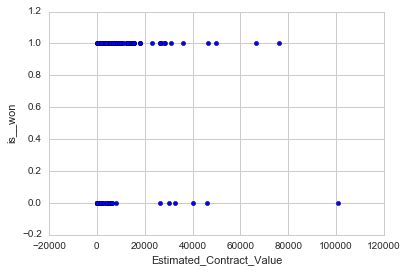

In [414]:
plt.scatter(opportunities.Estimated_Contract_Value, opportunities.is__won)
plt.xlabel('Estimated_Contract_Value')
plt.ylabel('is__won')

In [415]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

features_cols = ['Estimated_Contract_Value']
X = opportunities[features_cols]
y = opportunities.is__won
linreg.fit(X,y)
opportunities['is_won_prediction'] = linreg.predict(X)

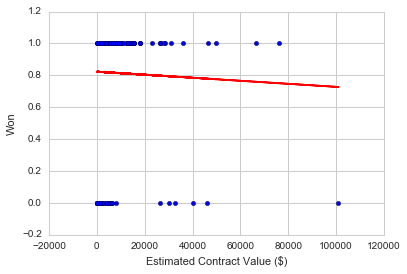

In [416]:
plt.scatter(opportunities.Estimated_Contract_Value, opportunities.is__won)
plt.plot(opportunities.Estimated_Contract_Value, opportunities.is_won_prediction, color='red')
plt.xlabel('Estimated Contract Value ($)')
plt.ylabel('Won')

In [417]:
opportunities['won_prediction_class'] = np.where(opportunities.is_won_prediction >= 0.5, 1, 0)
opportunities.head()

StageID stage_category  new_opportunity_days  \
opportunityId                                                 
981948               7            won                     0   
977958               7            won                     0   
972101               7            won                     0   
969817               7            won                     0   
967155               7            won                     0   

               qualified_opp_days  demo_complete_days  proposal_sent_days  \
opportunityId                                                               
981948                          0                   0                   0   
977958                          0                   0                   0   
972101                          0                   0                   0   
969817                          0                   0                   0   
967155                          4                   0                   0   

               pending_signature_days  nurture_days  closed_won_days  \
opportunityId                                                          
981948                              0             0                0   
977958                              0             0                0   
972101                             22             0                0   
969817                              0             0                0   
967155                              0             0                0   

               closed_lost         ...          _sales_rep__Rademacher  \
opportunityId                      ...                                   
981948                   0         ...                             0.0   
977958                   0         ...                             1.0   
972101                   0         ...                             0.0   
969817                   0         ...                             0.0   
967155                   0         ...                             0.0   

              _sales_rep__Reyna _sales_rep__Veeravalli _sales_rep__Warren  \
opportunityId                                                               
981948                      0.0                    1.0                0.0   
977958                      0.0                    0.0                0.0   
972101                      0.0                    1.0                0.0   
969817                      0.0                    1.0                0.0   
967155                      1.0                    0.0                0.0   

               forecast__Best Case forecast__Commit  forecast__Pipeline  \
opportunityId                                                             
981948                         0.0              1.0                 0.0   
977958                         0.0              1.0                 0.0   
972101                         1.0              0.0                 0.0   
969817                         0.0              1.0                 0.0   
967155                         0.0              1.0                 0.0   

               forecast__none  is_won_prediction won_prediction_class  
opportunityId                                                          
981948                    0.0           0.821057                    1  
977958                    0.0           0.820734                    1  
972101                    0.0           0.822364                    1  
969817                    0.0           0.820943                    1  
967155                    0.0           0.815791                    1  

[5 rows x 42 columns]

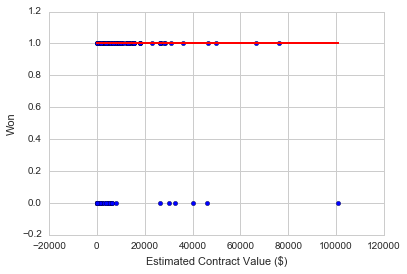

In [418]:
# predictions.
plt.scatter(opportunities.Estimated_Contract_Value, opportunities.is__won)
plt.plot(opportunities.Estimated_Contract_Value, opportunities.won_prediction_class, color='red')
plt.xlabel('Estimated Contract Value ($)')
plt.ylabel('Won')

In [419]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
feature_cols = ['Estimated_Contract_Value']
X = opportunities[feature_cols]
y = opportunities.is__won
logreg.fit(X, y)
opportunities['won_prediction_class'] = logreg.predict(X)

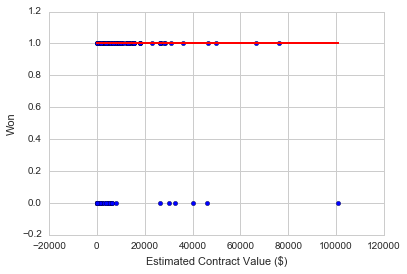

In [420]:
plt.scatter(opportunities.Estimated_Contract_Value, opportunities.is__won)
plt.plot(opportunities.Estimated_Contract_Value, opportunities.won_prediction_class, color='red')
plt.xlabel('Estimated Contract Value ($)')
plt.ylabel('Won')

In [421]:
# store the predicted probabilites of class 1
opportunities['won_pred_prob'] = logreg.predict_proba(X)[:, 1]

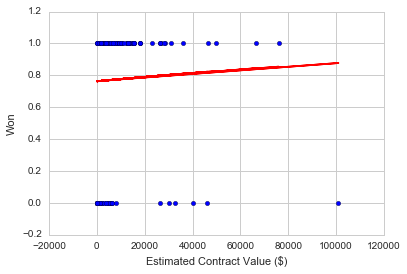

In [422]:
# plot the predicted probabilities
plt.scatter(opportunities.Estimated_Contract_Value, opportunities.is__won)
plt.plot(opportunities.Estimated_Contract_Value, opportunities.won_pred_prob, color='red')
plt.xlabel('Estimated Contract Value ($)')
plt.ylabel('Won')